In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv('training_mush.csv')

In [7]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [ ]:
#1 параметры подбираем оптимальные с помощью randomforest

In [13]:
clf_rf = RandomForestClassifier(random_state=0)

In [11]:
parametrs = {'n_estimators': range(10,51,10), 'max_depth': range(1,13,2),\
             'min_samples_leaf': range(8), 'min_samples_split': range(2,10,2)}

In [19]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)

In [17]:
y = df['class']
X = df.drop('class', axis=1)

In [20]:
grid_search_cv_clf.fit(X, y)

C:\Users\Vlaso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vlaso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vlaso\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Vlaso\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Vlaso\anaconda3\lib\site-package

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(0, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [21]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [22]:
best_clf = grid_search_cv_clf.best_estimator_

In [23]:
feature_importances = best_clf.feature_importances_

In [24]:
feature_importances_df = pd.DataFrame({'features':list(X), 'feature_importances':feature_importances})

In [25]:
feature_importances_df.sort_values('feature_importances',ascending=False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [26]:
X_test = pd.read_csv('testing_mush.csv')

In [32]:
best_clf.predict(X_test).sum() #количество 1

976

In [33]:
y_test = pd.read_csv('testing_y_mush.csv')

In [2]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(best_clf.predict(X_test) ,y_test)

array([[1055,    0],
       [   0,  976]], dtype=int64)

In [3]:
df = pd.read_csv('invasion.csv')
X_test = pd.read_csv('operative_information.csv')

In [7]:
y_train = df['class']
X_train = df.drop('class', axis=1)

In [8]:
clf = RandomForestClassifier(random_state=0)

In [9]:
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [11]:
y_pred = clf.predict(X_test)

In [14]:
pd.Series(y_pred).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [17]:
feature_importances = clf.feature_importances_

In [19]:
feature_importances_df = pd.DataFrame({'features':list(X_test), 'feature_importances':feature_importances})

In [20]:
feature_importances_df.sort_values('feature_importances',ascending=False)

,features,feature_importances
5,volume,0.323855
3,brightness,0.278944
0,g_reflection,0.185294
2,speed,0.117529
1,i_reflection,0.093694
4,time_of_observance,0.000685


In [21]:
df_place = pd.read_csv('space_can_be_a_dangerous_place.csv')

In [22]:
df_place.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

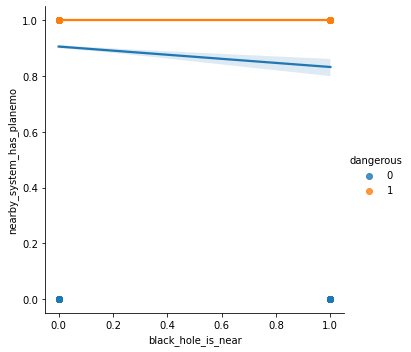

In [32]:
sns.lmplot(x = 'black_hole_is_near', y = 'nearby_system_has_planemo', hue = 'dangerous', data = df_place)

In [34]:
df_place.corr() #показывает связь между фитчами

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000
